<a href="https://colab.research.google.com/github/Swethaaneha/WHJR-Projects/blob/main/Hunting_Exoplanets_In_Space.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

exo_train_df = pd.read_csv('https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/kepler-exoplanets-dataset/exoTrain.csv')
exo_train_df.head()


,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,-207.47,-154.88,-173.71,-146.56,-120.26,-102.85,-98.71,-48.42,-86.57,-0.84,-25.85,-67.39,-36.55,-87.01,-97.72,-131.59,-134.80,-186.97,-244.32,-225.76,-229.60,-253.48,-145.74,-145.74,30.47,-173.39,-187.56,-192.88,-182.76,...,-167.69,-56.86,7.56,37.40,-81.13,-20.10,-30.34,-320.48,-320.48,-287.72,-351.25,-70.07,-194.34,-106.47,-14.80,63.13,130.03,76.43,131.90,-193.16,-193.16,-89.26,-17.56,-17.31,125.62,68.87,100.01,-9.60,-25.39,-16.51,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,-86.51,-74.97,-73.15,-86.13,-76.57,-61.27,-37.23,-48.53,-30.96,-8.14,-5.54,15.79,45.71,10.61,40.66,16.70,15.18,11.98,-203.70,19.13,19.13,19.13,19.13,19.13,17.02,-8.50,-13.87,-29.10,-34.29,...,-36.75,-15.49,-13.24,20.46,-1.47,-0.40,27.80,-58.20,-58.20,-72.04,-58.01,-30.92,-13.42,-13.98,-5.43,8.71,1.80,36.59,-9.80,-19.53,-19.53,-24.32,-23.88,-33.07,-9.03,3.75,11.61,-12.66,-5.69,12.53,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,469.66,462.30,492.23,441.20,483.17,481.28,535.31,554.34,562.80,540.14,576.34,551.67,556.69,550.86,577.33,562.08,577.97,530.67,553.27,538.33,527.17,532.50,273.66,273.66,292.39,298.44,252.64,233.58,171.41,...,-51.09,-33.30,-61.53,-89.61,-69.17,-86.47,-140.91,-84.20,-84.20,-89.09,-55.44,-61.05,-29.17,-63.80,-57.61,2.70,-31.25,-47.09,-6.53,14.00,14.00,-25.05,-34.98,-32.08,-17.06,-27.77,7.86,-70.77,-64.44,-83.83,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,311.14,326.19,313.11,313.89,317.96,330.92,341.10,360.58,370.29,369.71,339.00,336.24,319.31,321.56,308.02,296.82,279.34,275.78,289.67,281.33,285.37,281.87,88.75,88.75,67.71,74.46,69.34,76.51,80.26,...,-2.75,14.29,-14.18,-25.14,-13.43,-14.74,2.24,-31.07,-31.07,-50.27,-39.22,-51.33,-18.53,-1.99,10.43,-1.97,-15.32,-23.38,-27.71,-36.12,-36.12,-15.65,6.63,10.66,-8.57,-8.29,-21.90,-25.80,-29.86,7.42,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,-933.30,-889.49,-888.66,-853.95,-800.91,-754.48,-717.24,-649.34,-605.71,-575.62,-526.37,-490.12,-458.73,-447.76,-419.54,-410.76,-404.10,-425.38,-397.29,-412.73,-446.49,-413.46,-1006.21,-1006.21,-973.29,-986.01,-975.88,-982.20,-953.73,...,-694.76,-705.01,-625.24,-604.16,-668.26,-742.18,-820.55,-874.76,-874.76,-853.68,-808.62,-777.88,-712.62,-694.01,-655.74,-599.74,-617.30,-602.98,-539.29,-672.71,-672.71,-594.49,-597.60,-560.77,-501.95,-461.62,-468.59,-513.24,-504.70,-521.95,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [ ]:
exo_test_df = pd.read_csv('https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/kepler-exoplanets-dataset/exoTest.csv')
exo_test_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,-21.97,-23.17,-29.26,-33.99,-6.25,-28.12,-27.24,-32.28,-12.29,-16.57,-23.86,-5.69,9.24,35.52,81.20,116.49,133.99,148.97,174.15,187.77,215.30,246.80,-56.68,-56.68,-56.68,-52.05,-31.52,-31.15,-48.53,-38.93,...,-2.55,12.26,-7.06,-23.53,2.54,30.21,38.87,-22.86,-22.86,-4.37,2.27,-16.27,-30.84,-7.21,-4.27,13.60,15.62,31.96,49.89,86.93,86.93,42.99,48.76,22.82,32.79,30.76,14.55,10.92,22.68,5.91,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,5458.80,5329.39,5191.38,5031.39,4769.89,4419.66,4218.92,3924.73,3605.30,3326.55,3021.20,2800.61,2474.48,2258.33,1951.69,1749.86,1585.38,1575.48,1568.41,1661.08,1977.33,2425.62,2889.61,3847.64,3847.64,3741.20,3453.47,3202.61,2923.73,2694.84,...,-3470.75,-4510.72,-5013.41,-3636.05,-2324.27,-2688.55,-2813.66,-586.22,-586.22,-756.80,-1090.23,-1388.61,-1745.36,-2015.28,-2359.06,-2516.66,-2699.31,-2777.55,-2732.97,1167.39,1167.39,1368.89,1434.80,1360.75,1148.44,1117.67,714.86,419.02,57.06,-175.66,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,150.46,85.49,-20.12,-35.88,-65.59,-15.12,16.60,-25.70,61.88,53.18,64.32,72.38,100.35,67.26,14.71,-16.41,-147.46,-231.27,-320.29,-407.82,-450.48,-146.99,-146.99,-146.99,-146.99,-166.30,-139.90,-96.41,-23.49,13.59,...,-35.24,-70.13,-35.30,-56.48,-74.60,-115.18,-8.91,-37.59,-37.59,-37.43,-104.23,-101.45,-107.35,-109.82,-126.27,-170.32,-117.85,-32.30,-70.18,314.29,314.29,314.29,149.71,54.60,12.60,-133.68,-78.16,-52.30,-8.55,-19.73,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,-679.56,-706.03,-720.56,-631.12,-659.16,-672.03,-665.06,-667.94,-660.84,-672.75,-644.91,-680.53,-620.50,-570.34,-530.00,-537.88,-578.38,-532.34,-532.38,-491.03,-485.03,-427.19,-380.84,-329.50,-286.91,-283.81,-298.19,-271.03,-268.50,-209.56,...,16.50,-1286.59,-1286.59,-1286.59,-1286.59,-1286.59,-1286.59,-1286.59,-1286.59,-14.94,64.09,8.38,45.31,100.72,91.53,46.69,20.34,30.94,-36.81,-33.28,-69.62,-208.00,-280.28,-340.41,-337.41,-268.03,-245.00,-230.62,-129.59,-35.47,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,14.62,-19.52,-11.43,-49.80,25.84,11.62,3.18,-9.59,14.49,8.82,32.32,-28.90,-28.90,-14.09,-30.87,-18.99,-38.60,-27.79,9.65,29.60,7.88,42.87,27.59,27.05,20.26,29.48,9.71,22.84,25.99,-667.55,...,-122.12,-32.01,-47.15,-56.45,-41.71,-34.13,-43.12,-53.63,-53.63,-53.63,-24.29,22.29,25.18,1.84,-22.29,-26.43,-12.12,-33.05,-21.66,-228.32,-228.32,-228.32,-187.35,-166.23,-115.54,-50.18,-37.96,-22.37,-4.74,-35.82,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84


In [ ]:
exo_train_df.shape
exo_test_df.shape

(570, 3198)

In [ ]:
exo_train_df.isnull().sum()

LABEL        0
FLUX.1       0
FLUX.2       0
FLUX.3       0
FLUX.4       0
            ..
FLUX.3193    0
FLUX.3194    0
FLUX.3195    0
FLUX.3196    0
FLUX.3197    0
Length: 3198, dtype: int64

In [ ]:
num_missing_values = 0
for column in exo_train_df.columns:
  for item in exo_train_df[column].isnull():
    if item == True:
      num_missing_values += 1

num_missing_values

0

In [ ]:
non_missing_values = 0
for column in exo_train_df.columns:
  for item in exo_train_df[column].isnull():
    if item == False:
      non_missing_values += 1

non_missing_values

16268226

**Scatter & Line Plots**

In [ ]:
star_0 = exo_train_df.iloc[0, :]
star_0.head()

LABEL      2.00
FLUX.1    93.85
FLUX.2    83.81
FLUX.3    20.10
FLUX.4   -26.98
Name: 0, dtype: float64

In [ ]:
star_1 = exo_train_df.iloc[1, :]
star_1.head()

LABEL      2.00
FLUX.1   -38.88
FLUX.2   -33.83
FLUX.3   -58.54
FLUX.4   -40.09
Name: 1, dtype: float64

In [ ]:
star_5085 = exo_train_df.iloc[5085, :]
star_5085.head()

LABEL     1.00
FLUX.1    3.82
FLUX.2    2.09
FLUX.3   -3.29
FLUX.4   -2.88
Name: 5085, dtype: float64

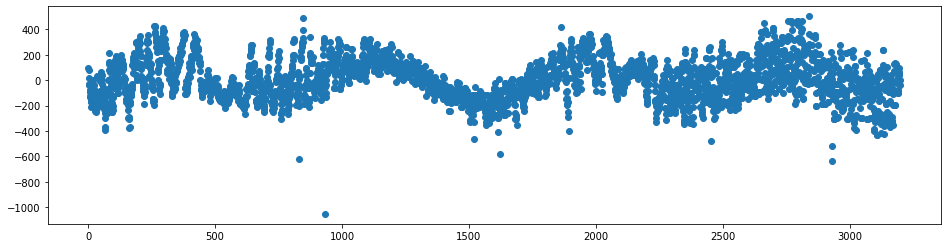

In [ ]:
plt.figure(figsize=(16, 4))
x_values_star_0 = np.arange(1, 3198)
y_values_star_0 = star_0[1:]
plt.scatter(x_values_star_0, y_values_star_0)
plt.show() 


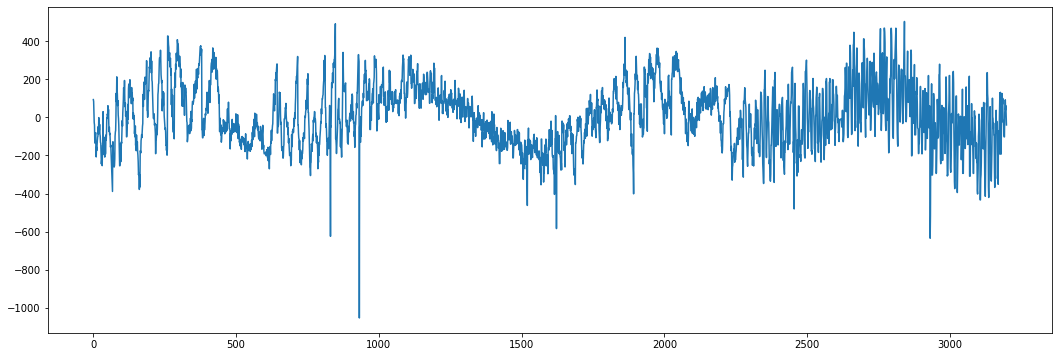

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(x_values_star_0, y_values_star_0)
plt.show()

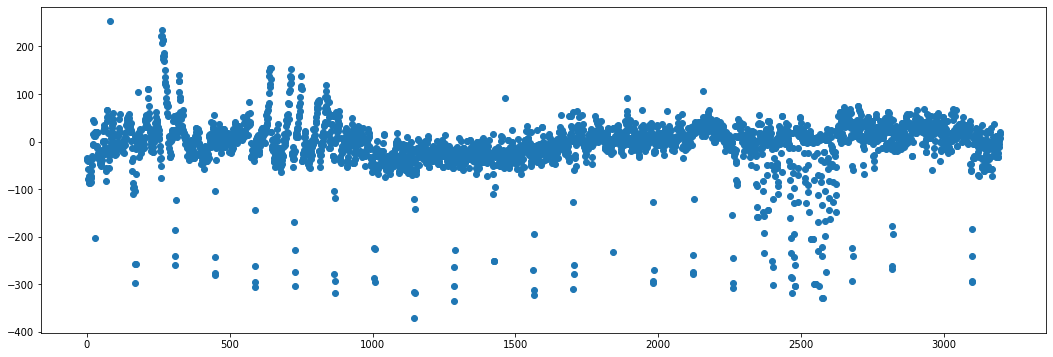

In [ ]:
plt.figure(figsize=(18, 6))
x_values_star_1 = np.arange(1, 3198)
y_values_star_1 = star_1[1:]
plt.scatter(x_values_star_1, y_values_star_1)
plt.show()

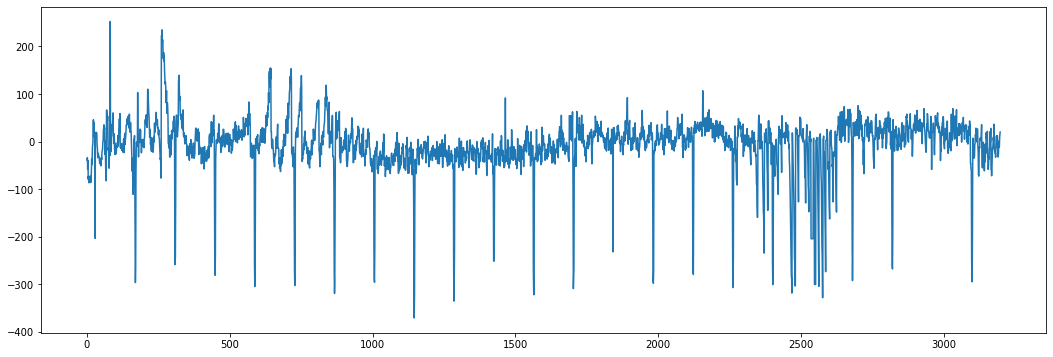

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(x_values_star_1, y_values_star_1)
plt.show() 

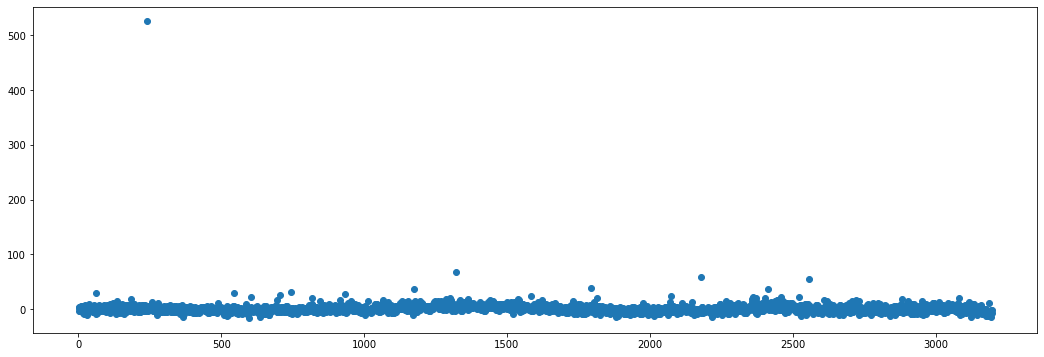

In [ ]:
plt.figure(figsize=(18, 6))

x_values_star_5085 = np.arange(1, 3198)
y_values_star_5085 = star_5085[1:]

plt.scatter(x_values_star_5085, y_values_star_5085)
plt.show()

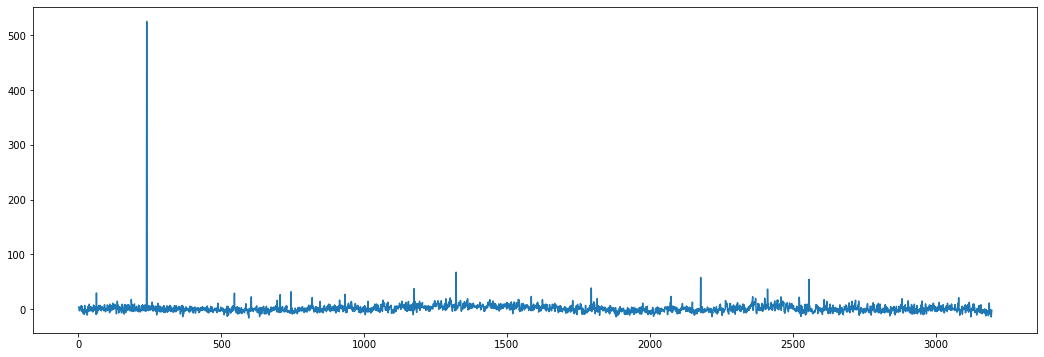

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(x_values_star_5085, y_values_star_5085)
plt.show()

**Data Normalisation**

In [28]:
def mean_normalise(series):
  norm_series = (series - series.mean()) / (series.max() - series.min())
  return norm_series

In [29]:
norm_train_df = exo_train_df.iloc[:, 1:].apply(mean_normalise, axis=1)
norm_train_df.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,FLUX.40,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,0.053834,0.047391,0.006510,-0.023699,-0.031772,-0.086410,-0.093128,-0.068161,-0.057650,-0.109164,-0.139515,-0.105769,-0.117852,-0.100430,-0.083555,-0.072383,-0.069726,-0.037457,-0.061937,-0.006926,-0.022974,-0.049629,-0.029840,-0.062219,-0.069091,-0.090825,-0.092884,-0.126360,-0.163160,-0.151251,-0.153715,-0.169038,-0.099904,-0.099904,0.013165,-0.117647,-0.126739,-0.130153,-0.123659,-0.132148,...,-0.113989,-0.042873,-0.001536,0.017611,-0.058446,-0.019285,-0.025855,-0.212030,-0.212030,-0.191009,-0.231774,-0.051349,-0.131090,-0.074706,-0.015884,0.034122,0.077049,0.042656,0.078249,-0.130332,-0.130332,-0.063663,-0.017655,-0.017494,0.074220,0.037805,0.057786,-0.012547,-0.022679,-0.016981,-0.056482,-0.071934,-0.071934,0.009738,0.024779,0.052993,0.018843,0.033024,-0.003127,-0.031759
1,-0.050411,-0.042317,-0.081922,-0.052351,-0.115212,-0.104794,-0.126816,-0.124861,-0.122681,-0.105708,-0.126752,-0.108256,-0.105339,-0.126143,-0.110821,-0.086298,-0.047767,-0.065878,-0.037717,-0.001141,0.003026,0.037214,0.085169,0.028911,0.077075,0.038672,0.036236,0.031107,-0.314584,0.042567,0.042567,0.042567,0.042567,0.042567,0.039185,-0.001718,-0.010325,-0.034736,-0.043054,-0.027652,...,-0.046997,-0.012922,-0.009316,0.044699,0.009549,0.011264,0.056463,-0.081377,-0.081377,-0.103560,-0.081073,-0.037653,-0.009604,-0.010502,0.003202,0.025866,0.014790,0.070552,-0.003802,-0.019397,-0.019397,-0.027075,-0.026369,-0.041099,-0.002568,0.017916,0.030514,-0.008386,0.002786,0.031988,0.006648,-0.039721,-0.039721,-0.027988,0.004116,0.013124,-0.006847,0.022260,0.037550,0.043849
2,0.243983,0.245509,0.235186,0.227365,0.208538,0.212981,0.212283,0.222467,0.199285,0.221536,0.214684,0.211260,0.225183,0.201444,0.220969,0.220089,0.245225,0.254078,0.258014,0.247472,0.264313,0.252836,0.255171,0.252459,0.264773,0.257679,0.265071,0.243066,0.253580,0.246630,0.241438,0.243918,0.123501,0.123501,0.132215,0.135029,0.113722,0.104855,0.075933,0.100408,...,-0.027578,-0.019301,-0.032434,-0.045498,-0.035989,-0.044037,-0.069363,-0.042981,-0.042981,-0.045256,-0.029601,-0.032211,-0.017380,-0.033490,-0.030611,-0.002554,-0.018348,-0.025717,-0.006848,0.002703,0.002703,-0.015463,-0.020083,-0.018734,-0.011746,-0.016729,-0.000153,-0.036733,-0.033788,-0.042809,-0.037161,0.002382,0.002382,-0.017715,-0.013523,-0.001456,-0.009299,-0.017259,-0.036384,-0.048782
3,0.518501,0.551177,0.480659,0.474051,0.504754,0.496863,0.511941,0.494687,0.496425,0.513506,0.494421,0.517984,0.497505,0.498726,0.505099,0.525390,0.541329,0.571828,0.587031,0.586123,0.538041,0.533719,0.507212,0.510735,0.489536,0.472000,0.444632,0.439058,0.460806,0.447748,0.454073,0.448593,0.146229,0.146229,0.113287,0.123856,0.115839,0.127065,0.132937,0.117358,...,0.002969,0.029649,-0.014926,-0.032086,-0.013752,-0.015803,0.010782,-0.041371,-0.041371,-0.071432,-0.054131,-0.073091,-0.021737,0.004159,0.023605,0.004191,-0.016711,-0.029331,-0.036110,-0.049277,-0.049277,-0.017228,0.017656,0.023965,-0.006143,-0.005704,-0.027013,-0.033119,-0.039476,0.018892,0.016215,0.001435,0.001435,0.054324,0.038636,-0.012562,-0.006456,-0.019827,-0.019889,0.029163
4,-0.399904,-0.401872,-0.404199,-0.395473,-0.381734,-0.373293,-0.360070,-0.368986,-0.356861,-0.350022,-0.336272,-0.320243,-0.319939,-0.307239,-0.287833,-0.270844,-0.257219,-0.232375,-0.216411,-0.205402,-0.187

In [30]:
norm_train_df.insert(loc=0, column='LABEL', value=exo_train_df['LABEL'])
norm_train_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,0.053834,0.047391,0.006510,-0.023699,-0.031772,-0.086410,-0.093128,-0.068161,-0.057650,-0.109164,-0.139515,-0.105769,-0.117852,-0.100430,-0.083555,-0.072383,-0.069726,-0.037457,-0.061937,-0.006926,-0.022974,-0.049629,-0.029840,-0.062219,-0.069091,-0.090825,-0.092884,-0.126360,-0.163160,-0.151251,-0.153715,-0.169038,-0.099904,-0.099904,0.013165,-0.117647,-0.126739,-0.130153,-0.123659,...,-0.113989,-0.042873,-0.001536,0.017611,-0.058446,-0.019285,-0.025855,-0.212030,-0.212030,-0.191009,-0.231774,-0.051349,-0.131090,-0.074706,-0.015884,0.034122,0.077049,0.042656,0.078249,-0.130332,-0.130332,-0.063663,-0.017655,-0.017494,0.074220,0.037805,0.057786,-0.012547,-0.022679,-0.016981,-0.056482,-0.071934,-0.071934,0.009738,0.024779,0.052993,0.018843,0.033024,-0.003127,-0.031759
1,2,-0.050411,-0.042317,-0.081922,-0.052351,-0.115212,-0.104794,-0.126816,-0.124861,-0.122681,-0.105708,-0.126752,-0.108256,-0.105339,-0.126143,-0.110821,-0.086298,-0.047767,-0.065878,-0.037717,-0.001141,0.003026,0.037214,0.085169,0.028911,0.077075,0.038672,0.036236,0.031107,-0.314584,0.042567,0.042567,0.042567,0.042567,0.042567,0.039185,-0.001718,-0.010325,-0.034736,-0.043054,...,-0.046997,-0.012922,-0.009316,0.044699,0.009549,0.011264,0.056463,-0.081377,-0.081377,-0.103560,-0.081073,-0.037653,-0.009604,-0.010502,0.003202,0.025866,0.014790,0.070552,-0.003802,-0.019397,-0.019397,-0.027075,-0.026369,-0.041099,-0.002568,0.017916,0.030514,-0.008386,0.002786,0.031988,0.006648,-0.039721,-0.039721,-0.027988,0.004116,0.013124,-0.006847,0.022260,0.037550,0.043849
2,2,0.243983,0.245509,0.235186,0.227365,0.208538,0.212981,0.212283,0.222467,0.199285,0.221536,0.214684,0.211260,0.225183,0.201444,0.220969,0.220089,0.245225,0.254078,0.258014,0.247472,0.264313,0.252836,0.255171,0.252459,0.264773,0.257679,0.265071,0.243066,0.253580,0.246630,0.241438,0.243918,0.123501,0.123501,0.132215,0.135029,0.113722,0.104855,0.075933,...,-0.027578,-0.019301,-0.032434,-0.045498,-0.035989,-0.044037,-0.069363,-0.042981,-0.042981,-0.045256,-0.029601,-0.032211,-0.017380,-0.033490,-0.030611,-0.002554,-0.018348,-0.025717,-0.006848,0.002703,0.002703,-0.015463,-0.020083,-0.018734,-0.011746,-0.016729,-0.000153,-0.036733,-0.033788,-0.042809,-0.037161,0.002382,0.002382,-0.017715,-0.013523,-0.001456,-0.009299,-0.017259,-0.036384,-0.048782
3,2,0.518501,0.551177,0.480659,0.474051,0.504754,0.496863,0.511941,0.494687,0.496425,0.513506,0.494421,0.517984,0.497505,0.498726,0.505099,0.525390,0.541329,0.571828,0.587031,0.586123,0.538041,0.533719,0.507212,0.510735,0.489536,0.472000,0.444632,0.439058,0.460806,0.447748,0.454073,0.448593,0.146229,0.146229,0.113287,0.123856,0.115839,0.127065,0.132937,...,0.002969,0.029649,-0.014926,-0.032086,-0.013752,-0.015803,0.010782,-0.041371,-0.041371,-0.071432,-0.054131,-0.073091,-0.021737,0.004159,0.023605,0.004191,-0.016711,-0.029331,-0.036110,-0.049277,-0.049277,-0.017228,0.017656,0.023965,-0.006143,-0.005704,-0.027013,-0.033119,-0.039476,0.018892,0.016215,0.001435,0.001435,0.054324,0.038636,-0.012562,-0.006456,-0.019827,-0.019889,0.029163
4,2,-0.399904,-0.401872,-0.404199,-0.395473,-0.381734,-0.373293,-0.360070,-0.368986,-0.356861,-0.350022,-0.336272,-0.320243,-0.319939,-0.307239,-0.287833,-0.270844,-0.257219,-0.232375,-0.216411,-0.205402,-0.187382,-0.174118,-0.162633,-0.158

In [31]:
norm_test_df = exo_test_df.iloc[:, 1:].apply(mean_normalise, axis=1)
norm_test_df.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,FLUX.40,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,0.273347,0.228221,0.196676,0.110003,0.104130,0.088690,0.040926,0.014337,0.013534,-0.052079,-0.054832,-0.068804,-0.079655,-0.016015,-0.066188,-0.064169,-0.075732,-0.029872,-0.039691,-0.056415,-0.014730,0.019521,0.079812,0.184609,0.265570,0.305717,0.340084,0.397851,0.429097,0.492255,0.564521,-0.131709,-0.131709,-0.131709,-0.121087,-0.073988,-0.073140,-0.113012,-0.090988,-0.061462,...,-0.007527,0.026450,-0.017873,-0.055658,0.004151,0.067630,0.087497,-0.054121,-0.054121,-0.011702,0.003531,-0.039003,-0.072428,-0.018217,-0.011473,0.029524,0.034158,0.071645,0.112779,0.197754,0.197754,0.096949,0.110186,0.050676,0.073549,0.068892,0.031703,0.023376,0.050355,0.011882,0.031635,0.042578,0.031451,-0.005393,0.028904,0.102708,0.071576,0.080408,0.616438,0.130742
1,0.394038,0.391480,0.392680,0.390974,0.388955,0.386673,0.386340,0.382364,0.381035,0.374634,0.365595,0.355955,0.344779,0.326513,0.302050,0.288028,0.267479,0.245166,0.225696,0.204367,0.188959,0.166178,0.151080,0.129661,0.115564,0.104075,0.103383,0.102889,0.109362,0.131452,0.162766,0.195175,0.262094,0.262094,0.254659,0.234561,0.217038,0.197559,0.181571,0.166160,...,-0.249097,-0.321740,-0.356853,-0.260644,-0.169015,-0.194461,-0.203200,-0.047612,-0.047612,-0.059527,-0.082817,-0.103659,-0.128578,-0.147432,-0.171446,-0.182454,-0.195212,-0.200677,-0.197563,0.074878,0.074878,0.088953,0.093556,0.088384,0.073554,0.071405,0.043269,0.022604,-0.002679,-0.018935,-0.047311,-0.075404,-0.092643,-0.118456,-0.134109,-0.150638,-0.164944,-0.171944,-0.166961,-0.148790
2,0.648150,0.627582,0.591444,0.519002,0.466046,0.385214,0.340496,0.281192,0.162553,0.119260,0.069748,-0.010734,-0.022744,-0.045385,-0.006923,0.017249,-0.014986,0.051756,0.045126,0.053615,0.059758,0.081073,0.055856,0.015809,-0.007906,-0.107775,-0.171644,-0.239483,-0.306187,-0.338697,-0.107417,-0.107417,-0.107417,-0.107417,-0.122133,-0.102014,-0.068872,-0.013302,0.014956,0.056107,...,-0.022256,-0.048845,-0.022302,-0.038442,-0.052251,-0.083176,-0.002191,-0.024047,-0.024047,-0.023925,-0.074831,-0.072713,-0.077209,-0.079091,-0.091627,-0.125196,-0.085210,-0.020016,-0.048883,0.244109,0.244109,0.244109,0.118688,0.046208,0.014201,-0.097274,-0.054964,-0.035257,-0.001916,-0.010436,0.018179,-0.034769,-0.032201,-0.041117,-0.057967,-0.128412,-0.067972,-0.119374,-0.023437,0.027941
3,-0.232813,-0.233212,-0.238944,-0.235869,-0.208281,-0.220224,-0.222214,-0.208586,-0.197319,-0.188186,-0.196253,-0.200681,-0.173424,-0.181969,-0.185891,-0.183767,-0.184645,-0.182481,-0.186111,-0.177627,-0.188482,-0.170188,-0.154902,-0.142609,-0.145010,-0.157352,-0.143322,-0.143334,-0.130733,-0.128905,-0.111279,-0.097154,-0.081508,-0.068529,-0.067585,-0.071967,-0.063690,-0.062919,-0.044958,-0.036084,...,0.023932,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,0.014351,0.038435,0.021458,0.032712,0.049598,0.046797,0.033132,0.025102,0.028333,0.007686,0.008762,-0.002312,-0.044482,-0.066509,-0.084833,-0.083919,-0.062776,-0.055758,-0.051376,-0.020587,0.008095,0.056186,0.047254,0.047254,0.039873,0.021893,0.025227,0.025075,-0.017912,-0.059585,-0.046740
4,-0.006994,0.003426,0.006382,0.007610,0.003316,-0.000167,0.010016,-0.009471,0.008195,0.016842,0.001825,0.005384,-0.011494,0.021778,0.015523,0.011810,0.006193,0.016785,0.014291,0.024628,-0.002301,-0.002301,

In [32]:
norm_test_df.insert(loc=0, column='LABEL', value=exo_test_df['LABEL'])
norm_test_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,0.273347,0.228221,0.196676,0.110003,0.104130,0.088690,0.040926,0.014337,0.013534,-0.052079,-0.054832,-0.068804,-0.079655,-0.016015,-0.066188,-0.064169,-0.075732,-0.029872,-0.039691,-0.056415,-0.014730,0.019521,0.079812,0.184609,0.265570,0.305717,0.340084,0.397851,0.429097,0.492255,0.564521,-0.131709,-0.131709,-0.131709,-0.121087,-0.073988,-0.073140,-0.113012,-0.090988,...,-0.007527,0.026450,-0.017873,-0.055658,0.004151,0.067630,0.087497,-0.054121,-0.054121,-0.011702,0.003531,-0.039003,-0.072428,-0.018217,-0.011473,0.029524,0.034158,0.071645,0.112779,0.197754,0.197754,0.096949,0.110186,0.050676,0.073549,0.068892,0.031703,0.023376,0.050355,0.011882,0.031635,0.042578,0.031451,-0.005393,0.028904,0.102708,0.071576,0.080408,0.616438,0.130742
1,2,0.394038,0.391480,0.392680,0.390974,0.388955,0.386673,0.386340,0.382364,0.381035,0.374634,0.365595,0.355955,0.344779,0.326513,0.302050,0.288028,0.267479,0.245166,0.225696,0.204367,0.188959,0.166178,0.151080,0.129661,0.115564,0.104075,0.103383,0.102889,0.109362,0.131452,0.162766,0.195175,0.262094,0.262094,0.254659,0.234561,0.217038,0.197559,0.181571,...,-0.249097,-0.321740,-0.356853,-0.260644,-0.169015,-0.194461,-0.203200,-0.047612,-0.047612,-0.059527,-0.082817,-0.103659,-0.128578,-0.147432,-0.171446,-0.182454,-0.195212,-0.200677,-0.197563,0.074878,0.074878,0.088953,0.093556,0.088384,0.073554,0.071405,0.043269,0.022604,-0.002679,-0.018935,-0.047311,-0.075404,-0.092643,-0.118456,-0.134109,-0.150638,-0.164944,-0.171944,-0.166961,-0.148790
2,2,0.648150,0.627582,0.591444,0.519002,0.466046,0.385214,0.340496,0.281192,0.162553,0.119260,0.069748,-0.010734,-0.022744,-0.045385,-0.006923,0.017249,-0.014986,0.051756,0.045126,0.053615,0.059758,0.081073,0.055856,0.015809,-0.007906,-0.107775,-0.171644,-0.239483,-0.306187,-0.338697,-0.107417,-0.107417,-0.107417,-0.107417,-0.122133,-0.102014,-0.068872,-0.013302,0.014956,...,-0.022256,-0.048845,-0.022302,-0.038442,-0.052251,-0.083176,-0.002191,-0.024047,-0.024047,-0.023925,-0.074831,-0.072713,-0.077209,-0.079091,-0.091627,-0.125196,-0.085210,-0.020016,-0.048883,0.244109,0.244109,0.244109,0.118688,0.046208,0.014201,-0.097274,-0.054964,-0.035257,-0.001916,-0.010436,0.018179,-0.034769,-0.032201,-0.041117,-0.057967,-0.128412,-0.067972,-0.119374,-0.023437,0.027941
3,2,-0.232813,-0.233212,-0.238944,-0.235869,-0.208281,-0.220224,-0.222214,-0.208586,-0.197319,-0.188186,-0.196253,-0.200681,-0.173424,-0.181969,-0.185891,-0.183767,-0.184645,-0.182481,-0.186111,-0.177627,-0.188482,-0.170188,-0.154902,-0.142609,-0.145010,-0.157352,-0.143322,-0.143334,-0.130733,-0.128905,-0.111279,-0.097154,-0.081508,-0.068529,-0.067585,-0.071967,-0.063690,-0.062919,-0.044958,...,0.023932,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,0.014351,0.038435,0.021458,0.032712,0.049598,0.046797,0.033132,0.025102,0.028333,0.007686,0.008762,-0.002312,-0.044482,-0.066509,-0.084833,-0.083919,-0.062776,-0.055758,-0.051376,-0.020587,0.008095,0.056186,0.047254,0.047254,0.039873,0.021893,0.025227,0.025075,-0.017912,-0.059585,-0.046740
4,2,-0.006994,0.003426,0.006382,0.007610,0.003316,-0.000167,0.010016,-0.009471,0.008195,0.016842,0.001825,0.005384,-0.011494,0.021778,0.015523,0.011810,0.006193,0.016785,0.014291,0.024628,-0.002301,-0.002301,0.004214,-0.003167,0.002058,-0

**Fast Fourier Transformation**

In [43]:
def fast_fourier_transform(star):
  fft_star = np.fft.fft(star, n=len(star))
  return np.abs(fft_star)

In [44]:
freq = np.fft.fftfreq(len(exo_train_df.iloc[0, 1:]))
freq

array([ 0.        ,  0.00031279,  0.00062559, ..., -0.00093838,
       -0.00062559, -0.00031279])

In [45]:
x_fft_train_T = norm_train_df.iloc[:, 1:].T.apply(fast_fourier_transform)
x_fft_train = x_fft_train_T.T
x_fft_train.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,FLUX.40,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,6.620116e-14,2.273248,35.722883,33.978236,128.816503,18.835061,16.101795,10.722037,18.488302,16.400976,1.920231,5.321160,11.332751,6.680037,12.021094,14.088651,15.247360,5.173820,7.720623,20.745046,8.957348,8.426093,14.832986,7.311026,9.442441,4.474428,5.662394,6.465002,4.272602,17.368854,8.195466,16.288997,4.299609,15.333522,8.889678,18.761014,13.248540,8.437022,11.048989,3.385416,...,11.958605,3.385416,11.048989,8.437022,13.248540,18.761014,8.889678,15.333522,4.299609,16.288997,8.195466,17.368854,4.272602,6.465002,5.662394,4.474428,9.442441,7.311026,14.832986,8.426093,8.957348,20.745046,7.720623,5.173820,15.247360,14.088651,12.021094,6.680037,11.332751,5.321160,1.920231,16.400976,18.488302,10.722037,16.101795,18.835061,128.816503,33.978236,35.722883,2.273248
1,4.821195e-14,30.299298,36.918808,38.376852,22.149931,33.282191,27.734204,11.862346,14.001221,14.221386,11.833992,13.256442,22.154585,13.553211,3.327314,14.056952,13.573917,9.102587,3.219534,7.289829,10.138438,6.733645,6.014359,29.899029,7.021179,8.345850,9.223856,11.485134,6.619756,13.554248,10.746137,7.591089,10.586435,7.877721,16.937570,4.360804,14.451814,8.484486,4.158838,6.130695,...,4.163371,6.130695,4.158838,8.484486,14.451814,4.360804,16.937570,7.877721,10.586435,7.591089,10.746137,13.554248,6.619756,11.485134,9.223856,8.345850,7.021179,29.899029,6.014359,6.733645,10.138438,7.289829,3.219534,9.102587,13.573917,14.056952,3.327314,13.553211,22.154585,13.256442,11.833992,14.221386,14.001221,11.862346,27.734204,33.282191,22.149931,38.376852,36.918808,30.299298
2,1.291464e-13,66.809870,19.498262,170.268810,48.413391,88.178733,57.407061,38.684283,10.503268,46.482585,22.681374,24.550247,16.277366,21.399836,21.978472,12.904352,21.021073,18.612100,8.887754,8.675205,14.092483,32.820582,13.151606,28.759359,14.533386,19.828422,21.486217,1.485398,12.608620,16.767271,16.029881,28.171315,14.046708,14.774095,22.184914,9.713089,21.081219,15.966226,4.523967,6.003082,...,14.722225,6.003082,4.523967,15.966226,21.081219,9.713089,22.184914,14.774095,14.046708,28.171315,16.029881,16.767271,12.608620,1.485398,21.486217,19.828422,14.533386,28.759359,13.151606,32.820582,14.092483,8.675205,8.887754,18.612100,21.021073,12.904352,21.978472,21.399836,16.277366,24.550247,22.681374,46.482585,10.503268,38.684283,57.407061,88.178733,48.413391,170.268810,19.498262,66.809870
3,2.498890e-14,19.369720,52.151962,108.097894,100.659024,269.416639,77.435861,71.256558,54.895479,33.335462,26.711804,31.754398,29.333060,24.021821,20.028949,24.799067,16.767433,19.513944,15.086840,14.070603,14.614616,10.716536,23.565979,15.180847,24.029569,17.296588,11.314895,10.407730,16.699691,7.168869,20.996939,14.448535,12.479272,16.166933,4.467943,11.777103,9.116722,4.873629,6.037218,10.522783,...,4.850993,10.522783,6.037218,4.873629,9.116722,11.777103,4.467943,16.166933,12.479272,14.448535,20.996939,7.168869,16.699691,10.407730,11.314895,17.296588,24.029569,15.180847,23.565979,10.716536,14.614616,14.070603,15.086840,19.513944,16.767433,24.799067,20.028949,24.021821,29.333060,31.754398,26.711804,33.335462,54.895479,71.256558,77.435861,269.416639,100.659024,108.097894,52.151962,19.369720
4,6.706859e-14,113.576655,51.382781,146.597215,148.627668,103.842855,116.738548,28.957862,36.451207,69.375686,4.923027,10.500032,7.8

In [46]:
x_fft_test_T = norm_test_df.iloc[:, 1:].T.apply(fast_fourier_transform)
x_fft_test = x_fft_test_T.T
x_fft_test.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,FLUX.40,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,5.126298e-15,23.184733,40.545472,17.994173,13.772498,16.594294,17.532422,8.094149,8.045917,9.549431,7.981027,5.287100,12.370191,8.395335,8.553800,4.309482,7.490986,10.080278,8.053845,4.251019,4.045196,4.938889,4.448891,6.867339,8.095095,3.053256,8.820256,7.712783,10.136966,8.355963,5.958016,9.640472,10.699294,6.819834,8.876643,6.950734,4.831057,5.636601,1.145892,6.599601,...,5.130651,6.599601,1.145892,5.636601,4.831057,6.950734,8.876643,6.819834,10.699294,9.640472,5.958016,8.355963,10.136966,7.712783,8.820256,3.053256,8.095095,6.867339,4.448891,4.938889,4.045196,4.251019,8.053845,10.080278,7.490986,4.309482,8.553800,8.395335,12.370191,5.287100,7.981027,9.549431,8.045917,8.094149,17.532422,16.594294,13.772498,17.994173,40.545472,23.184733
1,3.980211e-14,135.637702,42.680618,28.017660,17.672923,16.099550,62.999485,27.005547,26.735149,29.708628,9.883983,34.277524,72.281651,24.528767,4.534815,12.675589,15.834146,18.067399,13.654873,13.552821,21.800119,9.411672,0.903089,4.953368,4.798063,15.421308,8.244732,13.001946,4.563079,6.663124,1.724316,21.652624,15.739841,15.593781,5.901540,14.276665,11.181695,3.118744,8.458737,15.851903,...,23.188351,15.851903,8.458737,3.118744,11.181695,14.276665,5.901540,15.593781,15.739841,21.652624,1.724316,6.663124,4.563079,13.001946,8.244732,15.421308,4.798063,4.953368,0.903089,9.411672,21.800119,13.552821,13.654873,18.067399,15.834146,12.675589,4.534815,24.528767,72.281651,34.277524,9.883983,29.708628,26.735149,27.005547,62.999485,16.099550,17.672923,28.017660,42.680618,135.637702
2,2.581991e-14,101.624620,26.553454,11.634754,11.720122,46.153088,23.677302,22.208643,14.393021,3.278532,7.742408,9.010245,11.050290,15.234191,14.793277,7.146753,9.825702,4.178862,17.689056,5.301253,0.838855,5.453207,8.119005,6.874388,4.943019,4.889046,9.891267,2.335758,0.634175,9.118097,10.735174,15.531430,17.775452,5.374194,13.646464,2.894904,5.909334,6.081466,17.896810,5.259022,...,2.926198,5.259022,17.896810,6.081466,5.909334,2.894904,13.646464,5.374194,17.775452,15.531430,10.735174,9.118097,0.634175,2.335758,9.891267,4.889046,4.943019,6.874388,8.119005,5.453207,0.838855,5.301253,17.689056,4.178862,9.825702,7.146753,14.793277,15.234191,11.050290,9.010245,7.742408,3.278532,14.393021,22.208643,23.677302,46.153088,11.720122,11.634754,26.553454,101.624620
3,4.574132e-14,37.305651,20.537365,5.108229,16.309293,20.286675,18.969927,6.010526,8.763040,6.370417,16.668561,18.211277,3.796749,14.614066,12.865043,15.193305,4.960198,4.656041,5.049559,20.808633,19.072745,17.983037,55.100406,7.533258,3.688735,9.832614,2.530170,2.220069,6.144516,2.746874,6.569176,16.597156,11.903331,4.207380,7.016571,6.786262,14.311839,7.601058,3.766341,15.346786,...,3.619052,15.346786,3.766341,7.601058,14.311839,6.786262,7.016571,4.207380,11.903331,16.597156,6.569176,2.746874,6.144516,2.220069,2.530170,9.832614,3.688735,7.533258,55.100406,17.983037,19.072745,20.808633,5.049559,4.656041,4.960198,15.193305,12.865043,14.614066,3.796749,18.211277,16.668561,6.370417,8.763040,6.010526,18.969927,20.286675,16.309293,5.108229,20.537365,37.305651
4,2.879381e-14,7.138386,11.941614,12.808132,27.841397,39.681676,17.985758,30.233859,14.800046,8.501530,5.167375,6.483161,7.324964,6.815963,5.151272,11.916397,16.422263,15.649583,10.678073,8.039292,5.185997,1.507619,1.

**Oversampling SMOTE**

In [47]:
y_train = norm_train_df['LABEL']
y_test = norm_test_df['LABEL']

In [48]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(ratio=1)
x_fft_train_res, y_fft_train_res = smote.fit_sample(x_fft_train, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


**Deploying Random Forest Classifier**

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf_clf = RandomForestClassifier(n_jobs=-1, n_estimators=50)

rf_clf.fit(x_fft_train_res, y_fft_train_res)
print(rf_clf.score(x_fft_train_res, y_fft_train_res))

y_pred = rf_clf.predict(x_fft_test)
y_pred

1.0


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

**Model Evaluation**

In [51]:
from sklearn.ensemble import RandomForestClassifier
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[565   0]
 [  5   0]]
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       565
           2       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**XGBoost Classifier Model**

In [52]:
import xgboost as xg

model = xg.XGBClassifier()
model.fit(x_fft_train_res, y_fft_train_res)
y2_pred = model.predict(np.array(x_fft_test))
y2_pred

array([2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))